<a href="https://colab.research.google.com/github/giwon1115/2025-1-myclass-BDA/blob/main/inclass/10w_mon_0519_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10주 단원08-3 그래프 만들기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.8 MB/s eta 0:00:00


In [4]:
%config inlinebackend.figure_format = 'retina'

In [5]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 5.71 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [6]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [7]:
pd.set_option('display.precision',2)#숫자 출력 시 소수점 이하 두 자리까지 출력

In [8]:
df_mpg=mpg.groupby('drv').agg(mean_hwy=('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [9]:
df_mpg=mpg.groupby('drv',as_index=False).agg(mean_hwy=('hwy','mean'))
df_mpg#as_index=False-묶은 기준이 인덱스가 아니라 일반 컬럼으로 유지됨

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


In [10]:
plt.rcParams.update({'figure.figsize':[5,3]})# 그래프가 가로 5인치, 세로 3인치 크기로 그려짐

<Axes: xlabel='drv', ylabel='mean_hwy'>

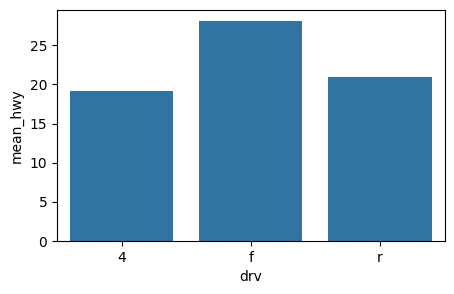

In [11]:
sns.barplot(df_mpg, x='drv',y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

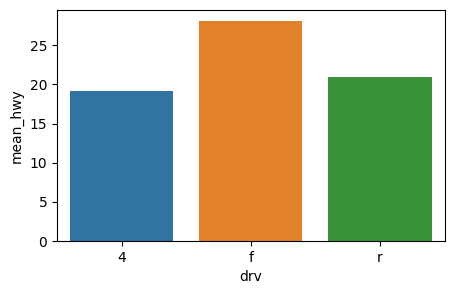

In [12]:
sns.barplot(df_mpg, x='drv',y='mean_hwy',hue='drv')

<Axes: xlabel='drv', ylabel='mean_hwy'>

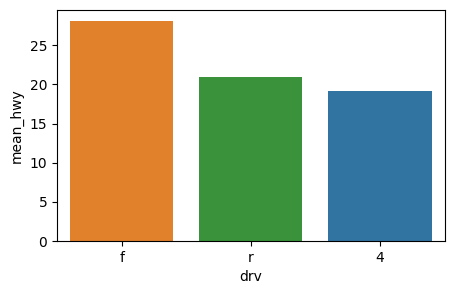

In [13]:
sns.barplot(df_mpg, x='drv',y='mean_hwy',hue='drv',order=['f','r','4'])
#order=['f', 'r', '4']=x축의 순서를 직접 지정 (전륜 → 후륜 → 4륜 순)

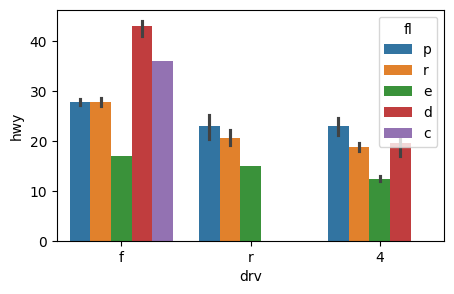

In [14]:
sns.barplot(data=mpg, x='drv', y='hwy', hue='fl', order=['f', 'r', '4']);

<Axes: xlabel='drv', ylabel='mean_hwy'>

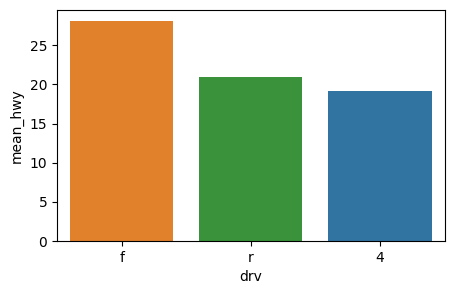

In [15]:
sns.barplot(df_mpg, x='drv',y='mean_hwy',hue='drv',order=['f','r','4'])

In [16]:
mpg.groupby('drv',as_index=False).count()
#count():각 그룹의 컬럼별 **NaN 제외 값 개수(=행 수)**를 계산

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [17]:
mpg.groupby('drv',as_index=False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [18]:
mpg.groupby('drv',as_index=False).count()[['drv','model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [19]:
mpg.groupby('drv',as_index=False).count()[['drv','model']].rename(columns={'model':'n'})
#drv의model 수 계산

,drv,n
0,4,103
1,f,106
2,r,25


In [20]:
df_mpg=mpg.groupby('drv',as_index=False).agg(n=('drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [21]:
df_mpg2=mpg.groupby('drv').agg(n=('drv','count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

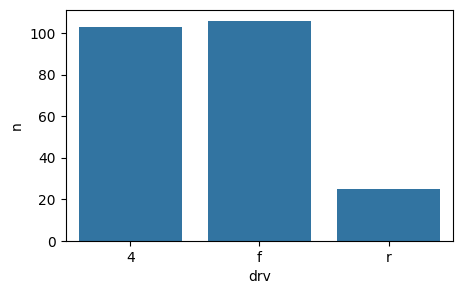

In [22]:
sns.barplot(df_mpg,x='drv',y='n')

<Axes: xlabel='drv', ylabel='n'>

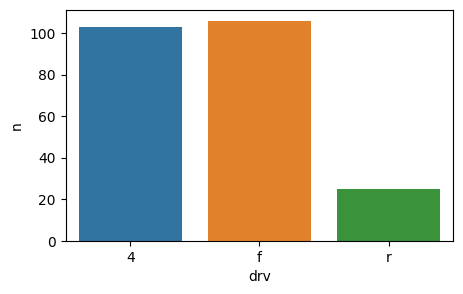

In [23]:
sns.barplot(df_mpg,x='drv',y='n',hue='drv')

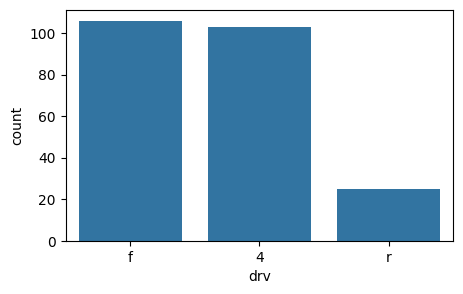

In [24]:
sns.countplot(mpg,x='drv');

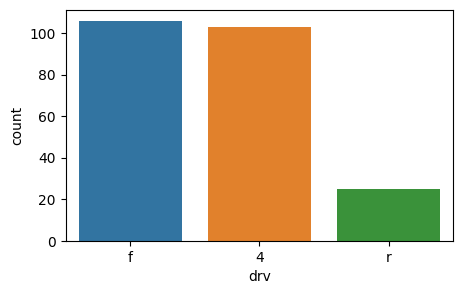

In [25]:
sns.countplot(mpg,x='drv',hue='drv');

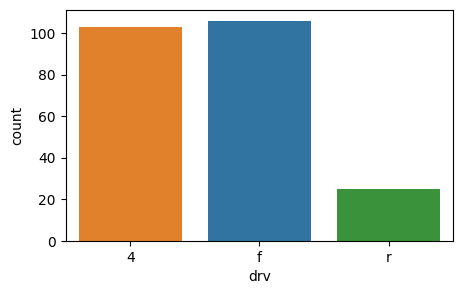

In [26]:
sns.countplot(mpg,x='drv',hue='drv',order=['4','f','r']);

<Axes: xlabel='drv', ylabel='n'>

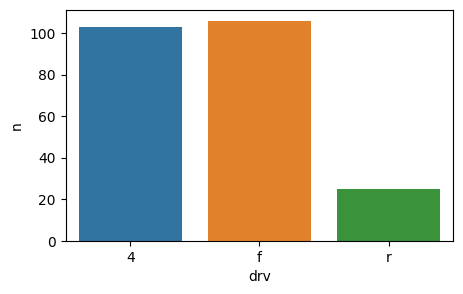

In [27]:
sns.barplot(df_mpg,x='drv',y='n',hue='drv')

In [28]:
eco=pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


### 주요 컬럼 설명
- date: 데이터 수집 날짜 (연도-월-일 형식)
- pce: 개인 소비 지출 (Personal Consumption Expenditures, 백만 달러 단위)
- pop: 인구 수 (Population, 천명 단위)
- psavert: 개인 저축률 (Personal Savings Rate, % 단위)
- uempmed: 실업자 평균 실업 기간 (Median Duration of Unemployment, 주 단위)
- unemploy: 실업자 수 (Unemployed, 천명 단위)

In [29]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [30]:
eco.tail()

,date,pce,pop,psavert,uempmed,unemploy
569,2014-12-01,12062.0,319746.16,7.6,12.9,8717
570,2015-01-01,12046.0,319928.65,7.7,13.2,8903
571,2015-02-01,12082.4,320074.51,7.9,12.9,8610
572,2015-03-01,12158.3,320230.79,7.4,12.0,8504
573,2015-04-01,12193.8,320402.29,7.6,11.5,8526


In [31]:
eco.shape

(574, 6)

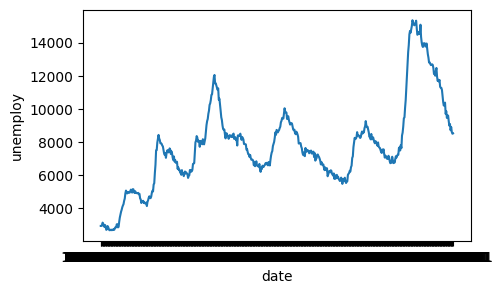

In [32]:
sns.lineplot(eco,x='date',y='unemploy');

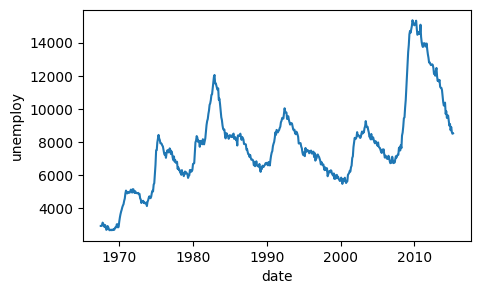

In [33]:
sns.lineplot(eco,x=pd.to_datetime(eco['date']),y='unemploy');
#x축: 날짜 컬럼을 datetime 형식으로 변환하여 사용

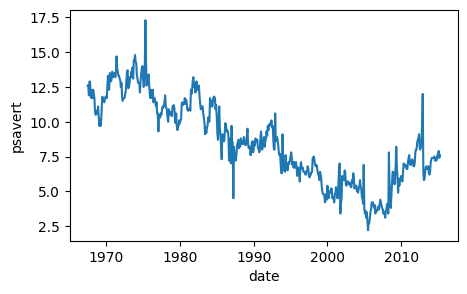

In [34]:
sns.lineplot(eco,x=pd.to_datetime(eco['date']),y='psavert');

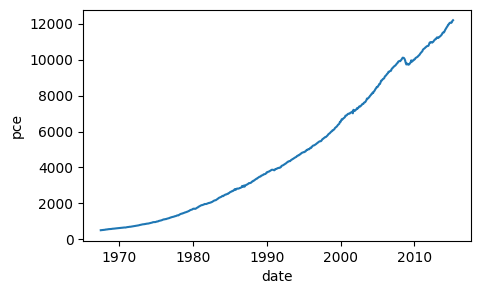

In [35]:
sns.lineplot(eco,x=pd.to_datetime(eco['date']),y='pce');
#date 열을 datetime 자료형으로 변환 (그래프 x축을 시간 순서로 정렬하기 위함)

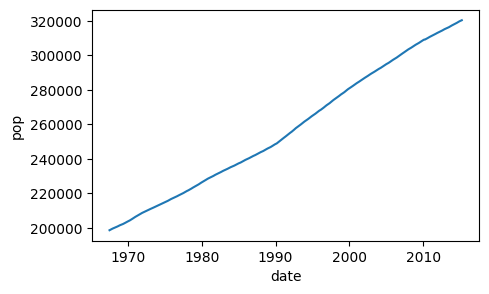

In [36]:
sns.lineplot(eco,x=pd.to_datetime(eco['date']),y='pop');

In [37]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [38]:
eco['date2']=pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [39]:
eco[['date','date2']]#date= object ,date2= datetime

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [40]:
eco[['date','date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [41]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [42]:
eco.date2.dt.year#dt=datetime 관련 속성에 접근하는 accessor
#pandas의 datetime 접근자 .dt를 사용해서 날짜 컬럼에서 연도(year)만 추출
#dt:datetime 전용 접근자 (날짜에서 특정 요소 추출할 때 사용)

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [43]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [44]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [65]:
eco['year']=eco['date2'].dt.year
eco['month']=eco['date2'].dt.month
eco['day']=eco['date2'].dt.day
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


In [66]:
eco['year']

,year
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


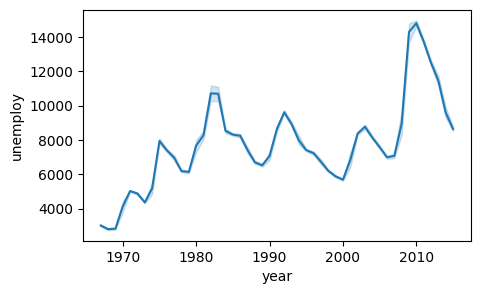

In [67]:
sns.lineplot(eco, x=eco['year'],y='unemploy');

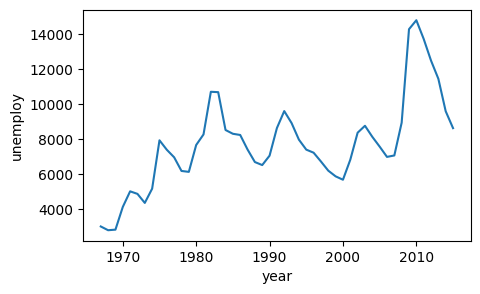

In [68]:
sns.lineplot(eco, x=eco['year'], y='unemploy', errorbar=None);

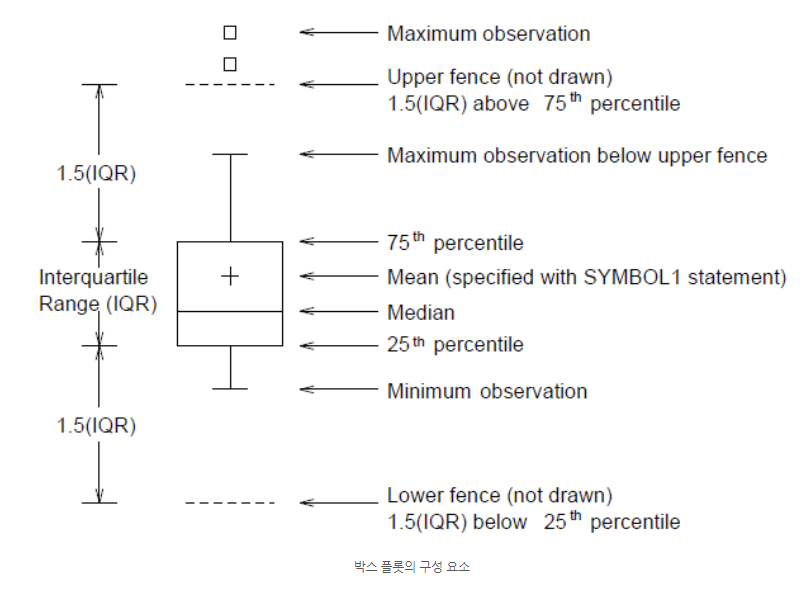

<Axes: xlabel='drv', ylabel='hwy'>

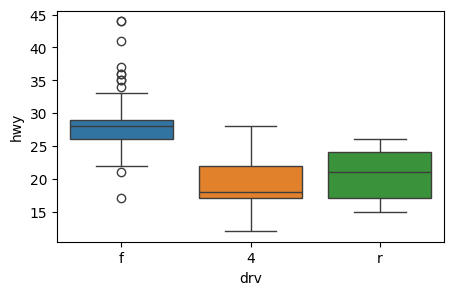

In [48]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')

In [49]:
plt.rcParams.update({'figure.figsize':[7,3]})

<Axes: xlabel='category', ylabel='hwy'>

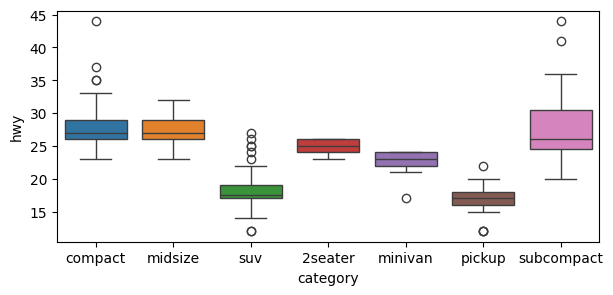

In [50]:
sns.boxplot(mpg, x='category', y='hwy', hue='category')

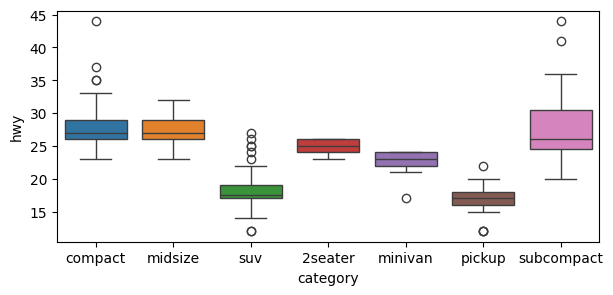

In [51]:
sns.boxplot(mpg, x='category', y='hwy', hue='category');

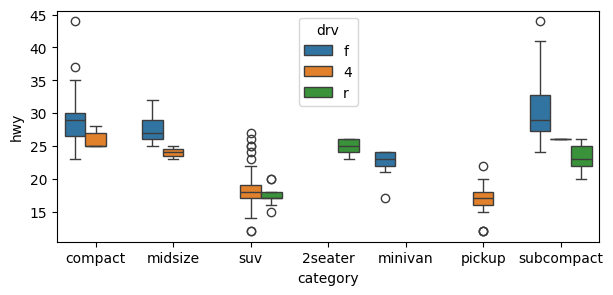

In [52]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

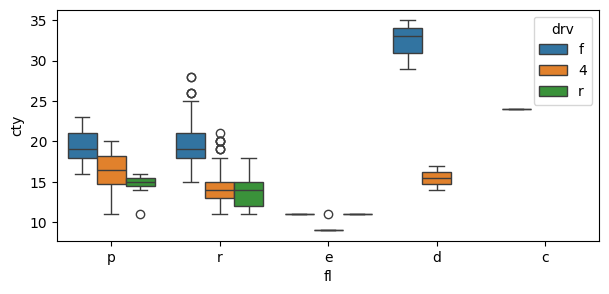

In [53]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv');

In [54]:
plt.rcParams.update({'figure.figsize':[5,3]})

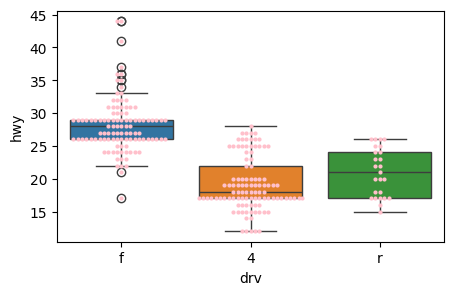

In [55]:
sns.boxplot(mpg,x='drv', y='hwy', hue='drv');
sns.swarmplot(mpg,x='drv', y='hwy', color='pink',size=3);

In [ ]:
sns.boxplot(mpg,x='drv', y='hwy', hue='drv');
sns.swarmplot(mpg,x='drv', y='hwy', color='cyan',size=3);

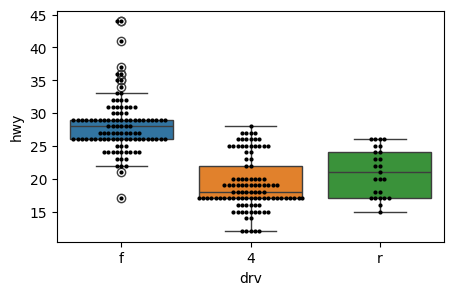

In [56]:
sns.boxplot(mpg,x='drv', y='hwy', hue='drv');
sns.swarmplot(mpg,x='drv', y='hwy', color='k',size=3);

In [57]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [58]:
test1,test2

(   id  midterm
 0   1       60
 1   2       80
 2   3       70
 3   4       90
 4   5       85,
    id  final
 0   1     70
 1   2     83
 2   3     65
 3   6     95
 4   7     80)

In [59]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [60]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,6,95
4,7,80


In [61]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [62]:
display_side_by_side(test1,test2)
#두 개 이상의 데이터프레임이나 객체를 나란히(옆으로) 비교해서 보여주기 위해 만든 사용자 정의 함수

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [63]:
display_side_by_side(test1,test2,test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


#08단원 종료